 #  Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import inventorize3 as inv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dosya_yolu = r'C:\\Users\\The Capri Hotel\\Downloads\\sale.csv'


In [3]:
sales = pd.read_csv(dosya_yolu);sales.head()

,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,order_date,order_date.1,order_date.2
0,141234,iPhone,5.638009e+12,Vêtements,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,2023-01-22 21:25:00,2023-01-22 21:25:00
1,141235,Lightning Charging Cable,5.563320e+12,Alimentation,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,2023-01-28 14:15:00,2023-01-28 14:15:00
2,141236,Wired Headphones,2.113973e+12,Vêtements,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,2023-01-17 13:33:00,2023-01-17 13:33:00
3,141237,27in FHD Monitor,3.069157e+12,Sports,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,2023-01-05 20:33:00,2023-01-05 20:33:00
4,141238,Wired Headphones,9.692681e+12,Électronique,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,2023-01-25 11:59:00,2023-01-25 11:59:00


In [4]:
sales.shape

(168463, 13)

In [5]:
sales.dtypes

Order ID              int64
Product              object
Product_ean         float64
catégorie            object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
order_date           object
order_date.1         object
order_date.2         object
dtype: object

In [6]:
sales = sales.drop(columns=['order_date.2','order_date.1'])


In [7]:
# Minimum & Max date in dataset
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%Y-%m-%d %H:%M:%S')
print(sales['order_date'].min(), sales['order_date'].max())

2023-01-01 03:07:00 2023-12-31 23:53:00


In [8]:
col_mapping = {
                'Order ID': 'order_id',
                'Product': 'product',
                'Product_ean': 'product_code',
                'catégorie': 'category',
                'Purchase Address': 'address',
                'Quantity Ordered': 'quantity',
                'Price Each': 'price',
                'Cost price': 'cost',
                'turnover': 'sales',
                'margin': 'gross_profit'}

sales.columns = [col_mapping[col] if col in col_mapping else col for col in sales.columns]
sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date
0,141234,iPhone,5.638009e+12,Vêtements,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00
1,141235,Lightning Charging Cable,5.563320e+12,Alimentation,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00
2,141236,Wired Headphones,2.113973e+12,Vêtements,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00
3,141237,27in FHD Monitor,3.069157e+12,Sports,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00
4,141238,Wired Headphones,9.692681e+12,Électronique,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00


In [9]:
cols = ['order_id', 'product_code']
sales[cols] = sales[cols].astype('str')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168463 entries, 0 to 168462
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      168463 non-null  object        
 1   product       168463 non-null  object        
 2   product_code  168463 non-null  object        
 3   category      168463 non-null  object        
 4   address       168463 non-null  object        
 5   quantity      168463 non-null  int64         
 6   price         168463 non-null  float64       
 7   cost          168463 non-null  float64       
 8   sales         168463 non-null  float64       
 9   gross_profit  168463 non-null  float64       
 10  order_date    168463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 14.1+ MB


In [10]:
# remove trailing dots and zeros from product_code values

sales['product_code'] = sales['product_code'].str[:-2]
sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date
0,141234,iPhone,5638008983335,Vêtements,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00
1,141235,Lightning Charging Cable,5563319511488,Alimentation,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00
2,141236,Wired Headphones,2113973395220,Vêtements,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00
3,141237,27in FHD Monitor,3069156759167,Sports,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00
4,141238,Wired Headphones,9692680938163,Électronique,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00


In [11]:
# create gross_margin column
sales['gross_margin'] = (round(sales['gross_profit'] / sales['sales'], 2))
sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin
0,141234,iPhone,5638008983335,Vêtements,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67
1,141235,Lightning Charging Cable,5563319511488,Alimentation,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50
2,141236,Wired Headphones,2113973395220,Vêtements,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50
3,141237,27in FHD Monitor,3069156759167,Sports,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35
4,141238,Wired Headphones,9692680938163,Électronique,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50


In [12]:
sales['cost'].value_counts()

cost
5.9750      19808
7.4750      19679
1.4950      18682
1.9200      18681
5.9950      17093
97.5000     14102
49.9950     12036
97.4935      6827
198.0000     6224
231.0000     6208
128.6967     5625
125.3967     5590
99.0000      4340
561.0000     4273
329.9967     3732
71.4935      3703
132.0000     1860
Name: count, dtype: int64

In [13]:
sales['period'] = sales['order_date'].dt.to_period('M')
sales['dow'] = sales['order_date'].dt.day_name()
sales['hour'] = sales['order_date'].dt.strftime('%I %p')
sales['date'] = sales['order_date'].dt.date
sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin,period,dow,hour,date
0,141234,iPhone,5638008983335,Vêtements,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67,2023-01,Sunday,09 PM,2023-01-22
1,141235,Lightning Charging Cable,5563319511488,Alimentation,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50,2023-01,Saturday,02 PM,2023-01-28
2,141236,Wired Headphones,2113973395220,Vêtements,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50,2023-01,Tuesday,01 PM,2023-01-17
3,141237,27in FHD Monitor,3069156759167,Sports,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35,2023-01,Thursday,08 PM,2023-01-05
4,141238,Wired Headphones,9692680938163,Électronique,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50,2023-01,Wednesday,11 AM,2023-01-25


In [39]:
# Lets clean the data
sales= sales.drop_duplicates() # drop all the duplicate line items
sales= sales.dropna()              # drop all null value rows

In [14]:
sales['revenue']=sales['quantity']*sales['price']

In [15]:
sales['product'].value_counts()

product
USB-C Charging Cable          19808
Lightning Charging Cable      19679
AAA Batteries (4-pack)        18682
AA Batteries (4-pack)         18681
Wired Headphones              17093
Apple Airpods Headphones      14102
Bose SoundSport Headphones    12036
27in FHD Monitor               6827
iPhone                         6208
27in 4K Gaming Monitor         5625
34in Ultrawide Monitor         5590
Google Phone                   5027
Flatscreen TV                  4340
Macbook Pro Laptop             4273
ThinkPad Laptop                3732
20in Monitor                   3703
Vareebadd Phone                1860
LG Washing Machine              611
LG Dryer                        586
Name: count, dtype: int64

In [16]:
sales[sales['category'] == 'Sports']['product']

3                 27in FHD Monitor
18            USB-C Charging Cable
23        Apple Airpods Headphones
24           AA Batteries (4-pack)
27            USB-C Charging Cable
                    ...           
168440                      iPhone
168443      27in 4K Gaming Monitor
168450        USB-C Charging Cable
168456        USB-C Charging Cable
168457            27in FHD Monitor
Name: product, Length: 42570, dtype: object

In [17]:
sales[sales['category'] == 'Vêtements']['product']

0                           iPhone
2                 Wired Headphones
6           27in 4K Gaming Monitor
7             USB-C Charging Cable
10        Apple Airpods Headphones
                    ...           
168434    Lightning Charging Cable
168441            Wired Headphones
168445      AAA Batteries (4-pack)
168452    Lightning Charging Cable
168455                      iPhone
Name: product, Length: 41921, dtype: object

In [18]:
sales[sales['category'] == 'Électronique']['product']

4                   Wired Headphones
8         Bose SoundSport Headphones
9           Apple Airpods Headphones
14                     Flatscreen TV
20            AAA Batteries (4-pack)
                     ...            
168446        AAA Batteries (4-pack)
168454      Lightning Charging Cable
168458              Wired Headphones
168460      Lightning Charging Cable
168461          USB-C Charging Cable
Name: product, Length: 41945, dtype: object

In [19]:
sales[sales['category'] == 'Alimentation']['product']

1           Lightning Charging Cable
5             AAA Batteries (4-pack)
15                  27in FHD Monitor
16                   Vareebadd Phone
17          Apple Airpods Headphones
                     ...            
168449    Bose SoundSport Headphones
168451      Lightning Charging Cable
168453        AAA Batteries (4-pack)
168459         AA Batteries (4-pack)
168462              27in FHD Monitor
Name: product, Length: 42027, dtype: object

In [20]:
def change_cat(df):
    """ pass a dataframe and return category values based on product"""
    if df['product'] in ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']:
        return 'batteries'
    elif df['product'] in ['USB-C Charging Cable', 'Lightning Charging Cable']:
        return 'charging cables'
    elif df['product'] in ['LG Dryer', 'LG Washing Machine']:
        return 'appliance'
    elif df['product'] in ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones']:
        return 'headphones'
    elif df['product'] in ['Macbook Pro Laptop', 'ThinkPad Laptop']:
        return 'laptops'
    elif df['product'] in ['iPhone', 'Google Phone', 'Vareebadd Phone']:
        return 'smartphones'
    elif df['product'] in ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor','20in Monitor']:
        return 'monitors'
    elif df['product'] in ['Flatscreen TV']:
        return 'smartTV'
    else:
        return 'others'

In [21]:
sales['category'] = sales.apply(change_cat, axis =1)
sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin,period,dow,hour,date,revenue
0,141234,iPhone,5638008983335,smartphones,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67,2023-01,Sunday,09 PM,2023-01-22,700.00
1,141235,Lightning Charging Cable,5563319511488,charging cables,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50,2023-01,Saturday,02 PM,2023-01-28,14.95
2,141236,Wired Headphones,2113973395220,headphones,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50,2023-01,Tuesday,01 PM,2023-01-17,23.98
3,141237,27in FHD Monitor,3069156759167,monitors,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35,2023-01,Thursday,08 PM,2023-01-05,149.99
4,141238,Wired Headphones,9692680938163,headphones,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50,2023-01,Wednesday,11 AM,2023-01-25,11.99


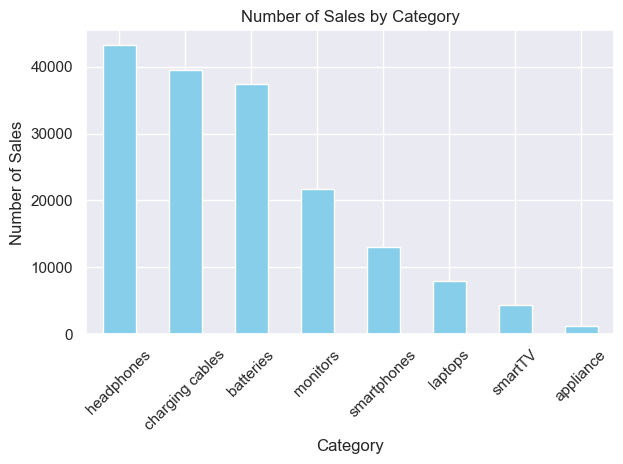

In [22]:
sales['category'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Number of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

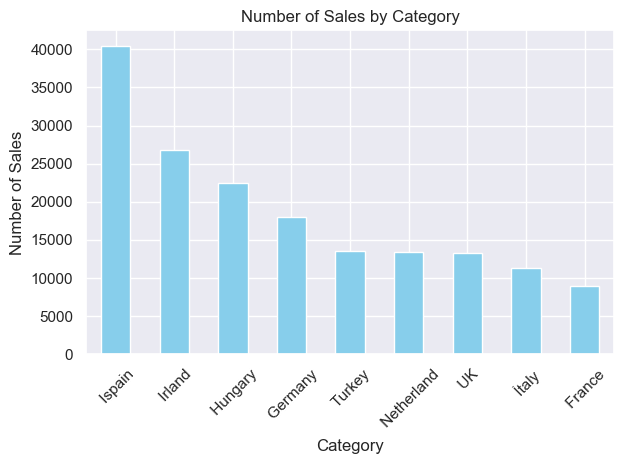

In [23]:
sales['address'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Number of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [24]:
sales.describe()

,quantity,price,cost,sales,gross_profit,order_date,gross_margin,revenue
count,168463.000000,168463.000000,168463.000000,168463.000000,168463.000000,168463,168463.000000,168463.000000
mean,1.124674,184.333657,69.652704,185.440054,115.249134,2023-07-03 06:07:53.856929792,0.516265,185.440054
min,1.000000,2.990000,1.495000,2.990000,1.495000,2023-01-01 03:07:00,0.350000,2.990000
25%,1.000000,11.950000,5.975000,11.950000,5.975000,2023-04-09 19:27:30,0.500000,11.950000
50%,1.000000,14.950000,7.475000,14.950000,7.475000,2023-06-28 22:31:00,0.500000,14.950000
75%,1.000000,150.000000,97.500000,150.000000,52.500000,2023-10-06 01:53:30,0.500000,150.000000
max,9.000000,1700.000000,561.000000,3400.000000,2278.000000,2023-12-31 23:53:00,0.670000,3400.000000
std,0.443388,332.604926,109.385588,332.833643,225.170138,NaN,0.097565,332.833643


In [25]:
sales.describe(include = 'object')

,order_id,product,product_code,category,address,dow,hour,date
count,168463,168463,168463,168463,168463,168463,168463,168463
unique,161119,19,168463,8,9,7,24,365
top,202348,USB-C Charging Cable,5638008983335,headphones,Ispain,Sunday,07 PM,2023-10-26
freq,6,19808,1,43231,40455,24403,11664,713


In [26]:
sales.groupby('period').agg({
                        'sales': 'sum',
                        'gross_profit': 'sum'})

,sales,gross_profit
period,,
2023-01,1813586.44,1.127681e+06
2023-02,2202022.42,1.369115e+06
2023-03,2807100.38,1.741473e+06
2023-04,3390670.24,2.109617e+06
2023-05,3152606.75,1.965322e+06
2023-06,2577802.26,1.602693e+06
2023-07,2647775.76,1.642685e+06
2023-08,2244467.88,1.396144e+06
2023-09,2097560.13,1.300184e+06


In [27]:
sales.groupby('period').agg({
                        'sales': 'sum',
                        'gross_profit': 'sum'})

,sales,gross_profit
period,,
2023-01,1813586.44,1.127681e+06
2023-02,2202022.42,1.369115e+06
2023-03,2807100.38,1.741473e+06
2023-04,3390670.24,2.109617e+06
2023-05,3152606.75,1.965322e+06
2023-06,2577802.26,1.602693e+06
2023-07,2647775.76,1.642685e+06
2023-08,2244467.88,1.396144e+06
2023-09,2097560.13,1.300184e+06


In [42]:
# Checking how many records there are in 2024
print('2024 Records:', sales[sales['period'] == '2024-01'].shape[0])

2024 Records: 0


January 2023 has only 9675 transactions. For ths purpose of further analysis, the records for 2023 will be removed.


In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168463 entries, 0 to 168462
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      168463 non-null  object        
 1   product       168463 non-null  object        
 2   product_code  168463 non-null  object        
 3   category      168463 non-null  object        
 4   address       168463 non-null  object        
 5   quantity      168463 non-null  int64         
 6   price         168463 non-null  float64       
 7   cost          168463 non-null  float64       
 8   sales         168463 non-null  float64       
 9   gross_profit  168463 non-null  float64       
 10  order_date    168463 non-null  datetime64[ns]
 11  gross_margin  168463 non-null  float64       
 12  period        168463 non-null  period[M]     
 13  dow           168463 non-null  object        
 14  hour          168463 non-null  object        
 15  date          168

In [43]:
sales.to_csv(r'C:\\Users\\The Capri Hotel\\Downloads\\sales_final_data.csv', index=False)
